In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

import mlrose

import numpy as np
import pandas as pd

from scipy.io import arff
import matplotlib.pyplot as plt
#FROM PROJECT 1 DATA PREP
# training_score = 'training score'
# cross_validation_score = 'cross validation score'
# y_label = 'fl score'

# np.random.seed(3141531) 
# tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
# pd.set_option('display.max_columns', None)


# file = "income_data_final.csv"
# df = pd.read_csv(file)
# df = df.sample(frac=1).reset_index(drop=True)

# #df = pd.DataFrame(data[0])
# features = ['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

# x_features = df[features]

# onehotencoder = OneHotEncoder(categorical_features = [1,3,4,5,6,7,8,9])
# x_features = onehotencoder.fit_transform(x_features).toarray()
# y_predict = df.y_predict

# #######################################################################
# ### NN FOR PROJECT 2
# #######################################################################




# #.1024
# #x_g,x_hypertune, y_g, y_hypertune  = train_test_split(x_features, y_predict, test_size=0.1024, random_state=143)
# x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=143)

# ##spliting training set into a smaller set
# x_g,x_hypertune, y_g, y_hypertune = train_test_split(x_train, y_train, test_size=0.2, random_state=122)


# train_sizes_lc = [300, 6000, 12000, 16000, 20000, 24000]


/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
# is wine data set better?
#loading wine data ..
file = "wine.arff"
data = arff.loadarff(file)
df = pd.DataFrame(data[0])

features = ['fixed_acidity',  'pH', 'residual_sugar', 'volatile_acidity',  
'citric_acid',  'chlorides', 'free_sulfur_dioxide',  
'total_sulfur_dioxide',  'density',  'sulphates', 'alcohol']

##remove pH, residual_sugar

x_features = df[features]
y_predict = df.quality

x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=1)
#x_train1, x_val1, y_train1, y_val1 = train_test_split(x_train, y_train, test_size=0.2, random_state=12)



train_sizes_lc = [30, 100, 250, 400, 600, 894]
train_sizes3 = [30, 120, 250, 400, 600, 894]

print(y_train)

126     0.0
810     0.0
635     0.0
598     1.0
880     0.0
       ... 
715     1.0
905     0.0
1096    1.0
235     1.0
1061    1.0
Name: quality, Length: 1119, dtype: float64


In [14]:
def plot_lc(title, train_sizes, train_scores, validation_scores):
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)


    plt.style.use('seaborn')
    plt.plot(train_sizes_lc, train_scores_mean, label = "training_score")
    plt.plot(train_sizes_lc, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

def plot_vc(title, train_scores, validation_scores, plot_range):
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)

    plt.style.use('seaborn')
    plt.plot(plot_range, train_scores_mean, label = "training_score")
    plt.plot(plot_range, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('max_iter', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

def plot_single(title, train_scores, plot_range):
    train_scores_mean = train_scores.mean(axis = 1)

    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)

    plt.style.use('seaborn')
    plt.plot(plot_range, train_scores_mean, label = "training_score")
    plt.plot(plot_range, validation_scores_mean, label = "cross_validation_score")
    plt.ylabel("f1 score", fontsize = 14)
    plt.xlabel('max_iter', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,1.0)
    
    return plt

In [16]:
# RANDOM HILL CLIMB

##LR .0001
nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=5)

#nn_model1_rhc.fit(x_train, y_train)
train_sizes_rhc, train_scores_rhc, validation_scores_rhc = learning_curve(
estimator = nn_model1_rhc,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)
    

Training scores:

 [[0.         0.69565217 0.66666667 0.54545455 0.69565217]
 [0.52892562 0.7654321  0.61290323 0.7518797  0.63076923]
 [0.60899654 0.54347826 0.64646465 0.65671642 0.70466321]
 [0.69546436 0.69979296 0.69918699 0.5720339  0.52466368]
 [0.70358306 0.71520343 0.         0.56913183 0.64748201]
 [0.56730769 0.07751938 0.48917749 0.42465753 0.69776119]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.         0.70144928 0.76491228 0.57241379 0.70348837]
 [0.50533808 0.69970845 0.54826255 0.6490566  0.6031746 ]
 [0.66666667 0.53497942 0.7238806  0.61728395 0.70348837]
 [0.72156863 0.61710037 0.70144928 0.53731343 0.52964427]
 [0.69411765 0.70144928 0.         0.5787234  0.66409266]
 [0.60663507 0.12121212 0.48760331 0.44343891 0.72      ]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

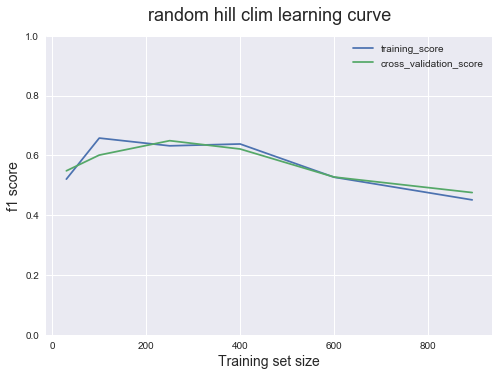

In [70]:
plot_lc("random hill clim learning curve", train_sizes_rhc, train_scores_rhc, validation_scores_rhc)

In [82]:
###LOOKING AT MAX_ITER
#### NN Hyperparam 1 ######
max_iter_rhc = []
for n in range(1, 10):
    max_iter_rhc.append(n*1000)

#early stoping should be true for runtime reasons
nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = False, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=3)

train_scores_rhc, validation_scores_rhc = validation_curve(
estimator = nn_model1_rhc,
param_name = "max_iter",
param_range = max_iter_rhc,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


Training scores:

 [[0.72008325 0.77029703 0.73760331 0.75074479 0.71778488]
 [0.75848303 0.75225677 0.73407482 0.75409836 0.74314721]
 [0.72147996 0.74682307 0.68023256 0.70930233 0.73193916]
 [0.74251497 0.73757455 0.74157303 0.72842105 0.73247779]
 [0.76482213 0.76239669 0.55369928 0.75883576 0.73892554]
 [0.74432379 0.76246334 0.70897552 0.68729989 0.74353877]
 [0.70610329 0.77137177 0.71273445 0.76190476 0.73385519]
 [0.         0.73333333 0.67689358 0.75939086 0.73333333]
 [0.7311828  0.73285568 0.72386588 0.71779744 0.73757455]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.68852459 0.70634921 0.76190476 0.66141732 0.71794872]
 [0.72093023 0.69291339 0.775      0.71146245 0.736     ]
 [0.67755102 0.70866142 0.72874494 0.65882353 0.73563218]
 [0.73517787 0.69565217 0.81327801 0.68619247 0.72156863]
 [0.76744186 0.71836735 0.56852792 0.68273092 0.72794118]
 [0.72941176 0.69803922 0.74181818 0.68103448 0.73809524]
 [0.70229008 0.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

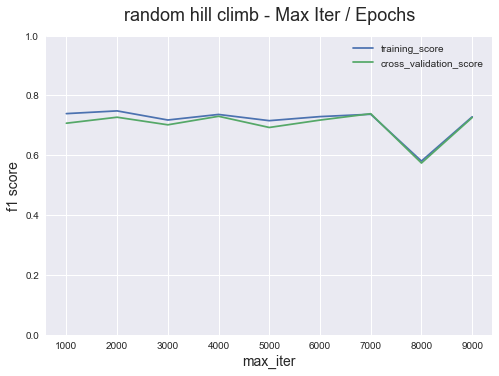

In [83]:
plot_vc("random hill climb - Max Iter / Epochs", train_scores_rhc, validation_scores_rhc, max_iter_rhc)

In [80]:
####TRAIN NN FOR RANDOM HILL CLIMB
nn_model1_rhc = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, restarts=3)

nn_model1_rhc.fit(x_train, y_train)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.1, max_iters=5000,
              mutation_prob=0.1, pop_size=200, restarts=3,
              schedule=<mlrose.decay.GeomDecay object at 0x125508690>)

In [81]:
#RANDOM HILL CLIMB RESULTS
y_pred_train = nn_model1_rhc.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_rhc.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_rhc.loss)

{'TRAIN': {'0.0': {'precision': 0.6841085271317829, 'recall': 0.6867704280155642, 'f1-score': 0.6854368932038835, 'support': 514}, '1.0': {'precision': 0.7330016583747927, 'recall': 0.7305785123966942, 'f1-score': 0.7317880794701985, 'support': 605}, 'accuracy': 0.710455764075067, 'macro avg': {'precision': 0.7085550927532878, 'recall': 0.7086744702061292, 'f1-score': 0.708612486337041, 'support': 1119}, 'weighted avg': {'precision': 0.7105431512622753, 'recall': 0.710455764075067, 'f1-score': 0.710497186046708, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.6651982378854625, 'recall': 0.6565217391304348, 'f1-score': 0.660831509846827, 'support': 230}, '1.0': {'precision': 0.6877470355731226, 'recall': 0.696, 'f1-score': 0.6918489065606361, 'support': 250}, 'accuracy': 0.6770833333333334, 'macro avg': {'precision': 0.6764726367292926, 'recall': 0.6762608695652174, 'f1-score': 0.6763402082037315, 'support': 480}, 'weighted avg': {'precision': 0.6769424033477854, 'recall': 0.67708

In [56]:
#### SIMULATED ANEALING

nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 15000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10000, \
                                 random_state = 33)
#nn_model1_rhc.fit(x_train, y_train)
train_sizes_sa, train_scores_sa, validation_scores_sa = learning_curve(
estimator = nn_model1_sa,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',

n_jobs=5)

Training scores:

 [[0.1        0.54054054 0.62857143 0.71794872 0.10526316]
 [0.62608696 0.58928571 0.42222222 0.03174603 0.        ]
 [0.70801034 0.36363636 0.69257951 0.62427746 0.59940653]
 [0.61261261 0.47272727 0.69918699 0.61764706 0.60853432]
 [0.71520343 0.56744186 0.59856115 0.53958944 0.        ]
 [0.         0.70152505 0.56570931 0.6174359  0.70246734]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.20289855 0.67137809 0.58237548 0.60273973 0.19480519]
 [0.58778626 0.55084746 0.39325843 0.         0.        ]
 [0.70144928 0.52674897 0.68016194 0.61587302 0.65605096]
 [0.61788618 0.40217391 0.70144928 0.55411255 0.60810811]
 [0.70144928 0.48510638 0.61417323 0.5511811  0.        ]
 [0.         0.70144928 0.51929825 0.61417323 0.70348837]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

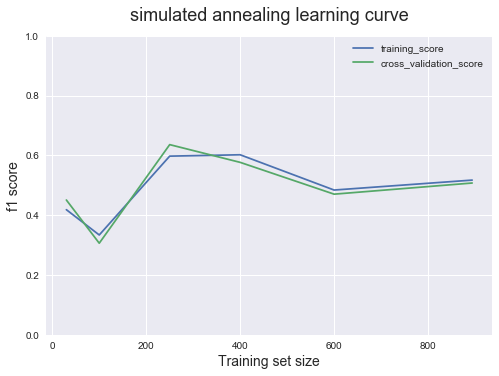

In [57]:
plot_lc("simulated annealing learning curve", train_sizes_sa, train_scores_sa, validation_scores_sa)

In [111]:
###LOOKING AT MAX_ITER
#### SA NN Hyperparam 1 ######

max_iter_sa = []
for n in range(1, 10):
    max_iter_sa.append(n*1000)

nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'simulated_annealing', max_iters = 10000, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 5000, \
                                 random_state = 33)

train_scores_sa, validation_scores_sa = validation_curve(
estimator = nn_model1_sa,
param_name = "max_iter",
param_range = max_iter_sa,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


Training scores:

 [[0.0242915  0.66341463 0.00819672 0.61627907 0.        ]
 [0.6820208  0.70195794 0.         0.         0.23344948]
 [0.04040404 0.34244946 0.0203252  0.         0.70144928]
 [0.         0.70195794 0.         0.         0.        ]
 [0.70579383 0.70195794 0.         0.62468931 0.        ]
 [0.70195794 0.00411523 0.70195794 0.70195794 0.        ]
 [0.         0.64903357 0.         0.0204499  0.70144928]
 [0.19197208 0.46189376 0.70195794 0.63123467 0.        ]
 [0.         0.00412371 0.70195794 0.70195794 0.6123157 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.048      0.60162602 0.01626016 0.61889251 0.01639344]
 [0.67261905 0.70144928 0.         0.         0.24827586]
 [0.01626016 0.38647343 0.01626016 0.         0.70348837]
 [0.         0.70144928 0.         0.         0.        ]
 [0.7112462  0.70144928 0.         0.60465116 0.        ]
 [0.70144928 0.         0.70144928 0.70144928 0.        ]
 [0.         0.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

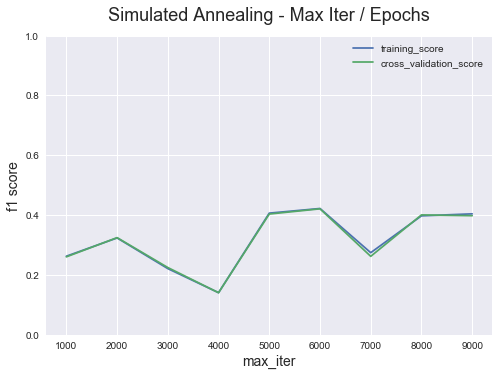

In [112]:
plot_vc("Simulated Annealing - Max Iter / Epochs", train_scores_sa, validation_scores_sa, max_iter_sa)

In [27]:
####TRAIN NN FOR SIM ANAL
nn_model1_sa = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 15000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10000, \
                                 random_state = 33)

nn_model1_sa.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/usr/local/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.5, max_iters=15000,
              mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x125870e90>)

In [28]:
# Predict labels for train set and assess accuracy
y_pred_train = nn_model1_sa.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_sa.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_sa.loss)

{'TRAIN': {'0.0': {'precision': 0.6968503937007874, 'recall': 0.688715953307393, 'f1-score': 0.6927592954990216, 'support': 514}, '1.0': {'precision': 0.7381342062193126, 'recall': 0.7454545454545455, 'f1-score': 0.7417763157894738, 'support': 605}, 'accuracy': 0.7193923145665773, 'macro avg': {'precision': 0.7174922999600499, 'recall': 0.7170852493809692, 'f1-score': 0.7172678056442476, 'support': 1119}, 'weighted avg': {'precision': 0.719170953641545, 'recall': 0.7193923145665773, 'f1-score': 0.7192609016435467, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.7296137339055794, 'recall': 0.7391304347826086, 'f1-score': 0.734341252699784, 'support': 230}, '1.0': {'precision': 0.757085020242915, 'recall': 0.748, 'f1-score': 0.7525150905432596, 'support': 250}, 'accuracy': 0.74375, 'macro avg': {'precision': 0.7433493770742472, 'recall': 0.7435652173913043, 'f1-score': 0.7434281716215219, 'support': 480}, 'weighted avg': {'precision': 0.7439216955396084, 'recall': 0.74375, 'f1-scor

In [12]:
#### GEN ALG START


nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 3000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = False, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, pop_size=500)

#nn_model1_rhc.fit(x_train, y_train)
train_sizes_ga, train_scores_ga, validation_scores_ga = learning_curve(
estimator = nn_model1_ga,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)

Training scores:

 [[0.85714286 0.8        0.75862069 0.88235294 0.86666667]
 [0.65486726 0.86885246 0.85294118 0.80620155 0.8125    ]
 [0.74860335 0.70503597 0.7037037  0.55384615 0.74916388]
 [0.73496659 0.75283447 0.69196429 0.66528067 0.74141876]
 [0.76033058 0.74777448 0.67053701 0.         0.61674009]
 [0.73301435 0.72520661 0.66076696 0.70292044 0.73933649]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.57959184 0.60076046 0.60557769 0.5907173  0.64822134]
 [0.552      0.67657993 0.76981132 0.6953405  0.71042471]
 [0.68789809 0.59919028 0.66382979 0.50643777 0.70943396]
 [0.65863454 0.61290323 0.78714859 0.6536965  0.7295082 ]
 [0.75812274 0.66666667 0.73228346 0.         0.6504065 ]
 [0.70769231 0.65587045 0.7        0.65338645 0.71641791]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

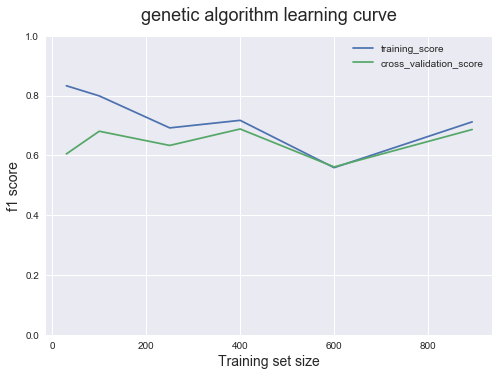

In [15]:
plot_lc("genetic algorithm learning curve", train_sizes_ga, train_scores_ga, validation_scores_ga)

In [117]:
###LOOKING AT MAX_ITER
#### SA NN Hyperparam 1 ######

max_iter_ga = []
for n in range(1, 10):
    max_iter_ga.append(n*5000)

nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 50000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = False, clip_max = 5, max_attempts = 80, \
                                 random_state = 33, pop_size=500)

train_scores_ga, validation_scores_ga = validation_curve(
estimator = nn_model1_ga,
param_name = "max_iter",
param_range = max_iter_ga,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',
n_jobs=5)


Training scores:

 [[0.74196689 0.74870734 0.60294118 0.72612802 0.72906404]
 [0.71071071 0.74418605 0.72104733 0.73147257 0.72164948]
 [0.68697479 0.75043937 0.75100402 0.75833333 0.70362903]
 [0.71486762 0.72874494 0.71442987 0.30870279 0.6787234 ]
 [0.70600203 0.71457086 0.67413442 0.70030272 0.62807882]
 [0.73396226 0.753122   0.71262136 0.69327731 0.69753695]
 [0.75763359 0.69072165 0.69716776 0.69781312 0.72417465]
 [0.73514602 0.71047228 0.70153846 0.73126873 0.72745902]
 [0.65904366 0.74851485 0.73645546 0.69128205 0.73514602]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.76744186 0.69135802 0.63203463 0.69879518 0.696     ]
 [0.69465649 0.66666667 0.75697211 0.69924812 0.70682731]
 [0.65517241 0.72222222 0.79166667 0.73092369 0.74603175]
 [0.65322581 0.69076305 0.7611336  0.29530201 0.70916335]
 [0.71936759 0.66159696 0.71666667 0.625      0.64761905]
 [0.7480916  0.68634686 0.77821012 0.5974026  0.68253968]
 [0.72659176 0.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

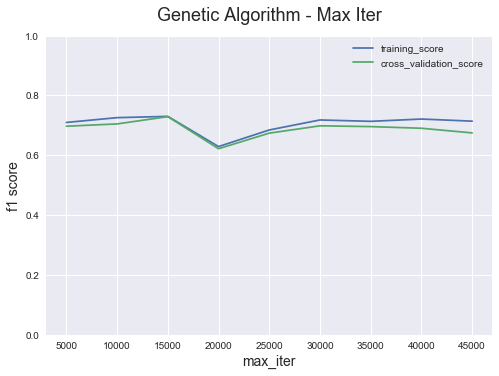

In [118]:
plot_vc("Genetic Algorithm - Max Iter", train_scores_ga, validation_scores_ga, max_iter_ga)

In [58]:
####TRAIN NN FOR GA
nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'tanh', \
                                 algorithm = 'genetic_alg', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = .5, \
                                 early_stopping = True, clip_max = 5, max_attempts = 500, \
                                 random_state = 33, pop_size=2000)

nn_model1_ga.fit(x_train, y_train)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True, hidden_nodes=[9, 8],
              is_classifier=True, learning_rate=0.5, max_iters=5000,
              mutation_prob=0.1, pop_size=2000, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x125870e90>)

In [59]:
## GA FINAL
# Predict labels for train set and assess accuracy
y_pred_train = nn_model1_ga.predict(x_train)
train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
print({"TRAIN": train_res})
print("\n")
# Predict labels for test set and assess accuracy
y_pred_test = nn_model1_ga.predict(x_test)

test_res = metrics.classification_report(y_test, y_pred_test, output_dict = True)
print({"TEST": test_res})

print("LOSS FUNCTION")
print(nn_model1_ga.loss)


{'TRAIN': {'0.0': {'precision': 0.703862660944206, 'recall': 0.31906614785992216, 'f1-score': 0.43908969210174026, 'support': 514}, '1.0': {'precision': 0.6049661399548533, 'recall': 0.8859504132231405, 'f1-score': 0.7189805499664655, 'support': 605}, 'accuracy': 0.6255585344057194, 'macro avg': {'precision': 0.6544144004495296, 'recall': 0.6025082805415314, 'f1-score': 0.5790351210341029, 'support': 1119}, 'weighted avg': {'precision': 0.6503931388722146, 'recall': 0.6255585344057194, 'f1-score': 0.590415848498665, 'support': 1119}}}


{'TEST': {'0.0': {'precision': 0.6964285714285714, 'recall': 0.3391304347826087, 'f1-score': 0.45614035087719296, 'support': 230}, '1.0': {'precision': 0.5869565217391305, 'recall': 0.864, 'f1-score': 0.6990291262135924, 'support': 250}, 'accuracy': 0.6125, 'macro avg': {'precision': 0.641692546583851, 'recall': 0.6015652173913043, 'f1-score': 0.5775847385453927, 'support': 480}, 'weighted avg': {'precision': 0.6394118788819877, 'recall': 0.6125, 'f1-sc

In [ ]:
####TEST
iter_nn_ga = []
for n in range(100,200):
    nn_model1_ga = mlrose.NeuralNetwork(hidden_nodes = [9,8], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = n, \
                                 bias = True, is_classifier = True, learning_rate = .01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 10, \
                                 random_state = 1, pop_size=500)
    nn_model1_ga.fit(x_train, y_train)
    y_pred_train = nn_model1_ga.predict(x_train)
    train_res = metrics.classification_report(y_train, y_pred_train, output_dict = True)
    iter_nn_ga.append(train_res["weighted avg"]["f1-score"])


    